In [1]:
import camelot
import pandas as pd

In [4]:
file_loc = r'C:\Users\digvi\Desktop\ChiStats\PyTesseract\PyTessearct Core Config\Test\Camelot\Final\Data\DRAGO SUPPLY CO\4403774992\4403774992.pdf'

In [5]:
tables = camelot.read_pdf(filepath=file_loc)

In [6]:
tables

<TableList n=3>

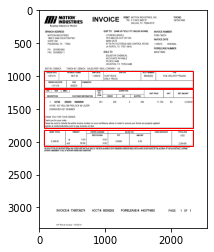

In [14]:
contour_plot = camelot.plot(tables[0], kind='contour')

In [15]:
contour_plot.savefig('4403774992_countour.jpg', dpi=300)

In [ ]:
def save_contour(tables):
    